# Prediction of future bike shares in London


This project is focused on prediction of count of bike shares(rentals) in London and  ``Regression`` methods such as ``Linear Regression``, ``Random Forest``, ``Decision Tree``, ``MLP Regressor`` will be used for the prediction.

## Attribute Analysis

**timestamp** - timestamp field for grouping the data\
**cnt** - the count of a new bike shares\
**t1** - real temperature in C\
**t2** - temperature in C "feels like"\
**hum** - humidity in percentage\
**wind_speed** - wind speed in km/h\
**weather_code** - category of the weather\
**is_holiday** - boolean field - 1 holiday / 0 non holiday\
**is_weekend** - boolean field - 1 if the day is weekend\
**season** - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

### weather_code category description:
*1* = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity\
*2* = scattered clouds / few clouds\
*3* = Broken clouds\
*4* = Cloudy\
*7* = Rain/ light Rain shower/ Light rain\
*10* = rain with thunderstorm\
*26* = snowfall\
*94* = Freezing Fog


## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn import linear_model
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
import sklearn.neural_network as nn

## Initial Look and Analysis of Data
## Read Data

In [2]:
bikeshare = pd.read_csv("bike_sharing.csv")

In [3]:
bikeshare.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
bikeshare.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [5]:
print(bikeshare.shape)

(17414, 10)


In [6]:
print(bikeshare.dtypes)

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


### Describe the data.

In [7]:
bikeshare.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [8]:
# create correlation matrix displaying pearson correlation coefficients for all variables
corr_matrix = bikeshare.corr()
corr_matrix

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000


# Data Preprocessing

Firstly let's convert  our `season`, `is_holiday` variables from numeric to categorical, and create new variables called `year`,`month`, `day`, `hour`, `weekday` from `timestamp` variable.

In [9]:
bikeshare_season = {
    'season': {0 : "spring", 1 : "summer", 2 : "fall", 3 : "winter"}
}

bikeshare_hldy = {
    'is_holiday': {0 : 'not holiday', 1 : 'holiday'}
}

In [10]:
bikeshare['timestamp'] = pd.to_datetime(bikeshare['timestamp'])
bikeshare['year'] = bikeshare['timestamp'].dt.year
bikeshare['month'] = bikeshare['timestamp'].dt.month
bikeshare['day'] = bikeshare['timestamp'].dt.day
bikeshare['hour'] = bikeshare['timestamp'].dt.hour
bikeshare['weekday'] = bikeshare['timestamp'].dt.weekday
weekday = {0 : 'Mon', 1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikeshare['weekday'] = bikeshare['weekday'].map(weekday)

In [11]:
bikeshare = bikeshare.replace(bikeshare_season)
bikeshare = bikeshare.replace(bikeshare_hldy)

In [12]:
categoric_columns = list()
for column in bikeshare.columns:
    if len(bikeshare[column].unique()) < 10:
        print(column)
        print(bikeshare[column].unique())
        if column in bikeshare.columns[bikeshare.dtypes == "object"]:
            print("This column is an object type!\n")
            categoric_columns.append(column)
        if column == "cnt":
            print("This column is the output column!\n")

weather_code
[ 3.  1.  4.  7.  2. 26. 10.]
is_holiday
['not holiday' 'holiday']
This column is an object type!

is_weekend
[1. 0.]
season
['winter' 'spring' 'summer' 'fall']
This column is an object type!

year
[2015 2016 2017]
weekday
['Sun' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri' 'Sat']
This column is an object type!



In [13]:
bikeshare.columns[bikeshare.dtypes == "object"]

Index(['is_holiday', 'season', 'weekday'], dtype='object')

In [14]:
categoric_columns == bikeshare.columns[bikeshare.dtypes == "object"]

array([ True,  True,  True])

In [15]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  object        
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  object        
 10  year          17414 non-null  int64         
 11  month         17414 non-null  int64         
 12  day           17414 non-null  int64         
 13  hour          17414 non-null  int64         
 14  weekday       17414 non-null  object        
dtypes: datetime64[ns](1), float64(6), in

The dataset contains 15 variables and 17414 observations. There is a timestamp object and most of the variables are float type.



### Missing Value Treatment
Lets' check columns with NA and duplicate values.

In [16]:
bikeshare.duplicated().value_counts()

False    17414
dtype: int64

In [17]:
print('The number of duplicates is {}\n'.format(bikeshare.duplicated().sum()))
print('The total numer of rows is {}\n'.format(bikeshare.shape[0]))
print(f"Ratio is {round((bikeshare.duplicated().sum()/bikeshare.shape[0])*100, 2)}%")

The number of duplicates is 0

The total numer of rows is 17414

Ratio is 0.0%


In [18]:
bikeshare.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
year            0
month           0
day             0
hour            0
weekday         0
dtype: int64

The data neither has missing values nor duplicated ones.

Now, let's check the correlation between the features.

### Correlation Analaysis

<AxesSubplot:>

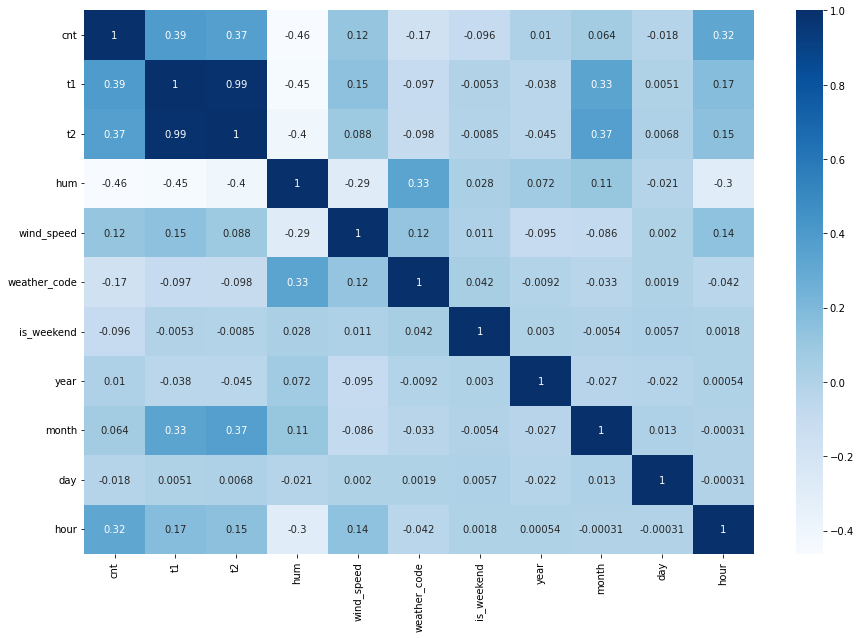

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(bikeshare.corr(), annot=True, cmap="Blues")

In [20]:
# Create correlation matrix
corr_matrix = bikeshare[bikeshare.columns[0:]].drop(categoric_columns, axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

C:\Users\JABIR~1.KAN\AppData\Local\Temp/ipykernel_19868/3909033262.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [21]:
# Find index of feature columns with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]
print(to_drop)

['t2']


We see strong correlation in between `t1` aka real temprature and `t2` temprature feels like variables which totally makes sence. Because this phenomenon is followed by other weather conditions. Since correlation is extremely high, we will use only `t1`, real temprature in C, in our analysis. 

In [22]:
bikeshare = bikeshare.drop('t2', 1)

C:\Users\JABIR~1.KAN\AppData\Local\Temp/ipykernel_19868/641519305.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  bikeshare = bikeshare.drop('t2', 1)


# Visualization

In [23]:
bikeshare.head()

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,weekday
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,3.0,not holiday,1.0,winter,2015,1,4,0,Sun
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,1.0,not holiday,1.0,winter,2015,1,4,1,Sun
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,1.0,not holiday,1.0,winter,2015,1,4,2,Sun
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,1.0,not holiday,1.0,winter,2015,1,4,3,Sun
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,1.0,not holiday,1.0,winter,2015,1,4,4,Sun


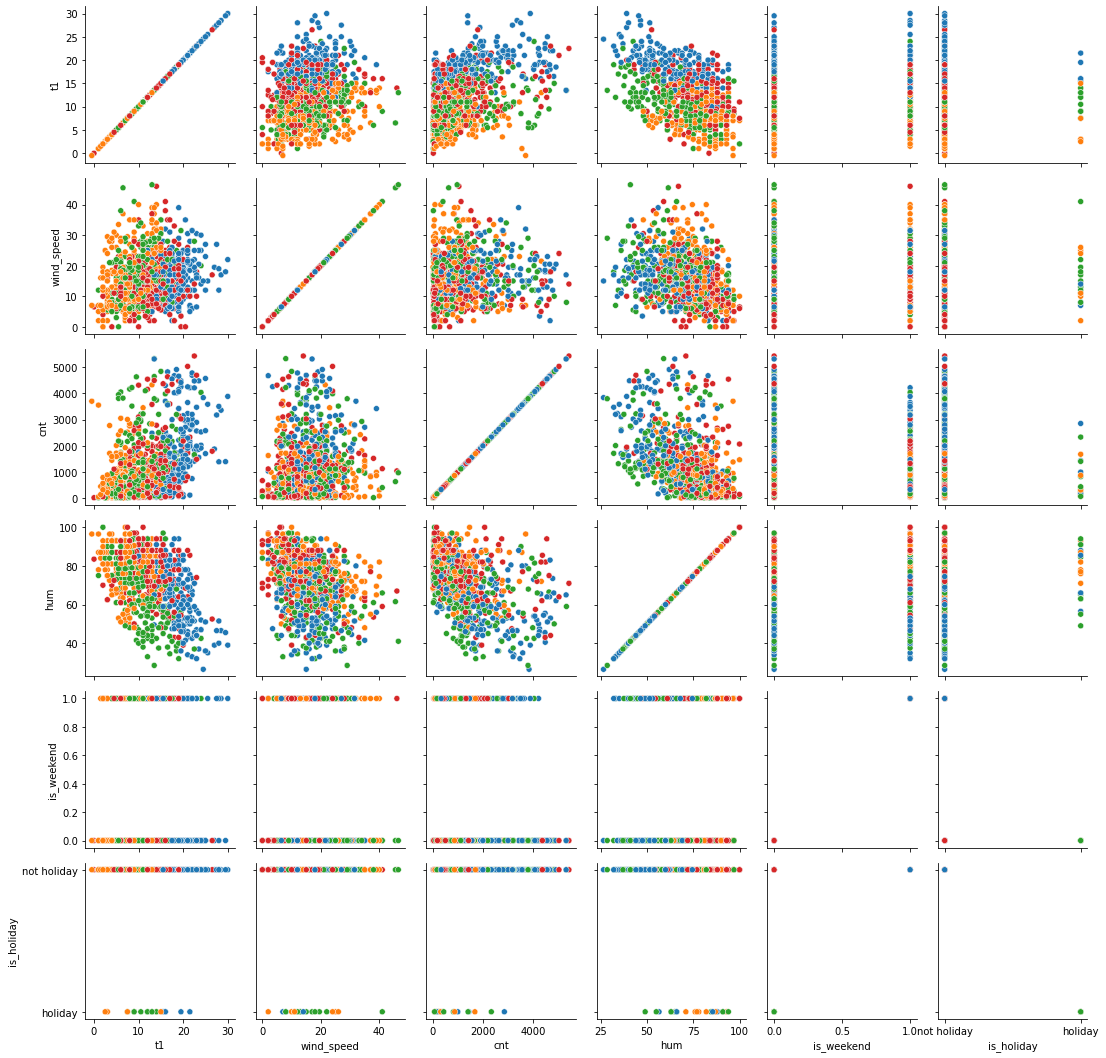

In [24]:
bikeshare_sample = bikeshare.sample(1000) 
bs_pg = sns.PairGrid(data= bikeshare_sample, vars=['t1','wind_speed', 'cnt', 'hum', 'is_weekend', 'is_holiday'],
                     hue = 'season')
bs_pg.map(sns.scatterplot)

Text(0.5, 1.0, 'Cycling on the weekend based on humidity')

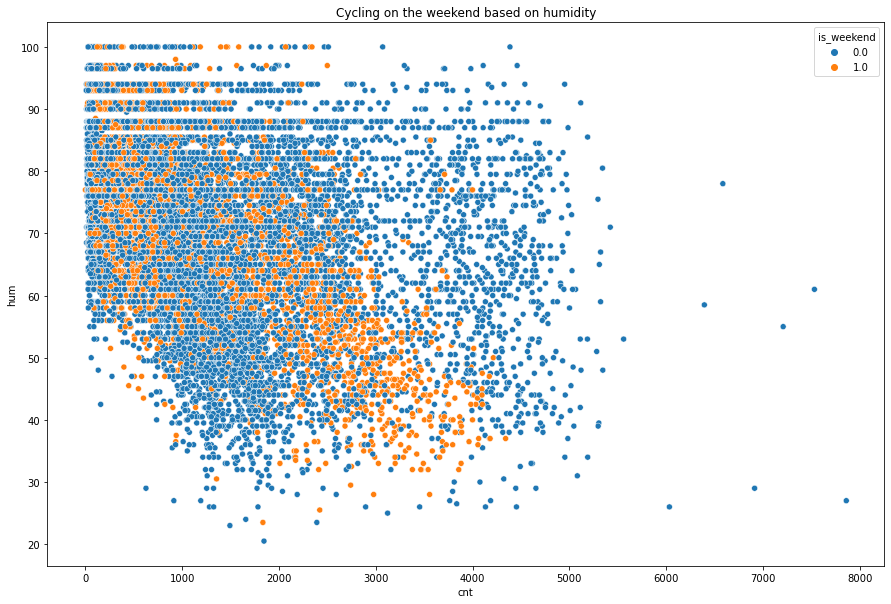

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(data=bikeshare, x="cnt", y="hum", hue="is_weekend")
plt.title("Cycling on the weekend based on humidity")

Vast majority of people prefer to cycle during the week.

<AxesSubplot:xlabel='season', ylabel='cnt'>

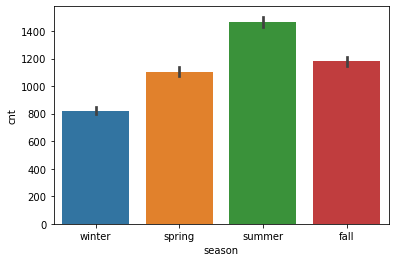

In [26]:
sns.barplot(data= bikeshare, x='season', y='cnt')

Obviously, people tend to use bikes in summer way more than other seasons. The trend is followed by fall, spring, and winter respectively.

<AxesSubplot:xlabel='year', ylabel='cnt'>

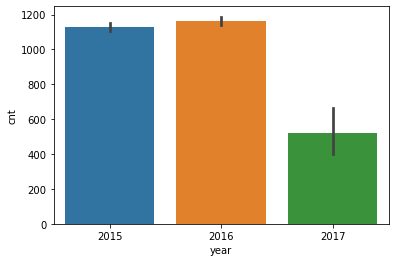

In [27]:
sns.barplot(data= bikeshare, x='year', y='cnt')

When compared per years, usage of bike share almost halved in comparison to 2015 and 2016. Additionally, it seems that 2016 was the best year for bike sharing.

<AxesSubplot:xlabel='month', ylabel='cnt'>

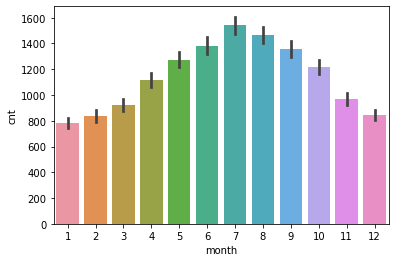

In [28]:
sns.barplot(data= bikeshare, x='month', y='cnt')

July and August is the most popular month for bikesharing as opposed to December and January.

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

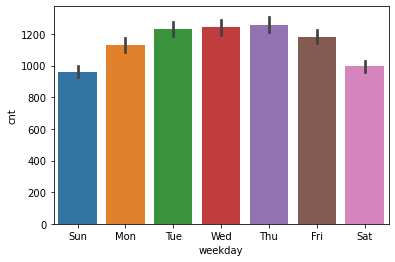

In [29]:
sns.barplot(data= bikeshare, x='weekday', y='cnt')

When it comes to weekdays, bikesharing is on its peak on Wednesday and Thursday.

<AxesSubplot:xlabel='hour1', ylabel='cnt'>

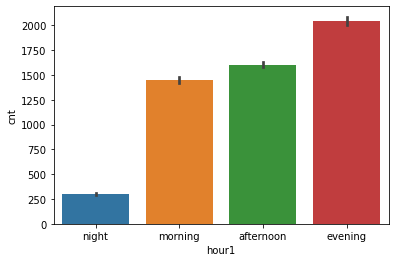

In [30]:
bikeshare['hour1'] = bikeshare['hour'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
                                              ['night','night','night','night','night','night','morning','morning','morning','morning',
                                              'morning','morning','morning', 'afternoon', 'afternoon','afternoon','afternoon','evening',
                                              'evening','evening','evening','night','night','night'])

sns.barplot(data= bikeshare, x='hour1', y='cnt')

People mostly go for cycling in the evening and afternoon during the day.

<AxesSubplot:xlabel='is_weekend', ylabel='cnt'>

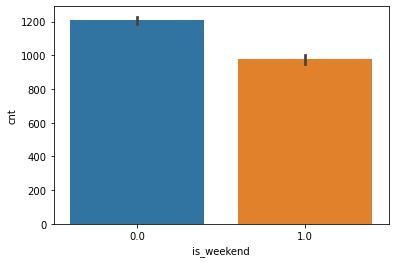

In [31]:
sns.barplot(data= bikeshare, x='is_weekend', y='cnt') # 1 if the day is weekend

During the week bike share is more than weekend.

<AxesSubplot:xlabel='count', ylabel='wcode'>

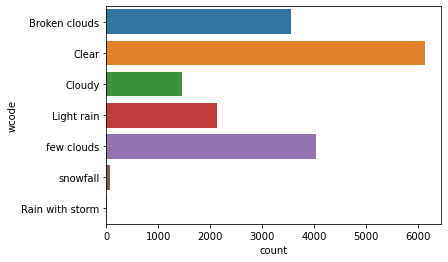

In [32]:
bikeshare['wcode'] = bikeshare['weather_code'].replace([1, 2, 3, 4, 7, 10, 26, 94],
                                              ["Clear", "few clouds", "Broken clouds", "Cloudy", "Light rain", "Rain with storm",
                                              "snowfall", "Freezing Fog"])

sns.countplot( y='wcode', data= bikeshare)

In [33]:
bikeshare.drop(['hour1', 'wcode'], axis=1, inplace=True)

In [34]:
bikeshare.head()

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,weekday
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,3.0,not holiday,1.0,winter,2015,1,4,0,Sun
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,1.0,not holiday,1.0,winter,2015,1,4,1,Sun
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,1.0,not holiday,1.0,winter,2015,1,4,2,Sun
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,1.0,not holiday,1.0,winter,2015,1,4,3,Sun
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,1.0,not holiday,1.0,winter,2015,1,4,4,Sun


<AxesSubplot:xlabel='hum', ylabel='cnt'>

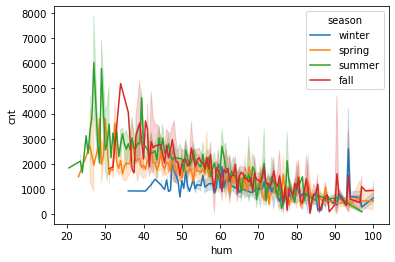

In [35]:
sns.lineplot(x='hum', y="cnt", data=bikeshare, hue='season')

<AxesSubplot:xlabel='cnt', ylabel='hum'>

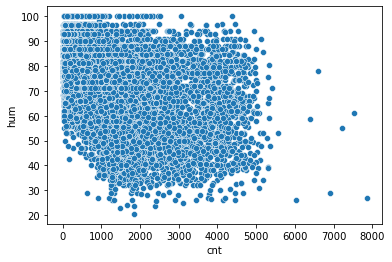

In [36]:
sns.scatterplot(x='cnt', y="hum", data=bikeshare)

During summer when the humidity was low, bike share reached on its peak. In fall and winter when the humidity was high the demand for bike share had also the same trend.

#### Correlation Plot with Output Column

We can observe positively and negatively correlated features to the output columns

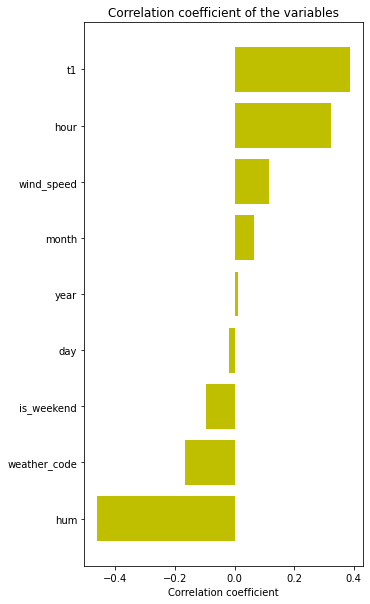

In [37]:
x_cols = pd.DataFrame(bikeshare[bikeshare.select_dtypes(include=['float64', 'int64']).columns]).columns['cnt' != (bikeshare[bikeshare.select_dtypes(include=['float64', 'int64']).columns]).columns]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(bikeshare[col].values, bikeshare["cnt"].values)[0,1])
corr_dfio = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_dfio = corr_dfio.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,10))
rects = ax.barh(ind, np.array(corr_dfio.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_dfio.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

# Feature Engineering & Feature Importance

**Output Variable**

- **``cnt``**

**Binary Variables**

- **``is_holiday``**

- **``is_weekend``**

**Categorical Variables**

- **``weather_code``**

- **``hour``** 

- **``season``**

- **``weekday``**

**Numeric Variables**

- **``year``**

- **``month``**

- **``day``**

- **``t1``**

- **``hum``**

- **``wind_speed``**

In [38]:
nominal_columns = ['is_holiday', 'season', 'weekday']

# Split data to input and output

In [39]:
X = bikeshare.copy()
X = X.drop(['cnt'], axis=1)
X.head()

,timestamp,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,weekday
0,2015-01-04 00:00:00,3.0,93.0,6.0,3.0,not holiday,1.0,winter,2015,1,4,0,Sun
1,2015-01-04 01:00:00,3.0,93.0,5.0,1.0,not holiday,1.0,winter,2015,1,4,1,Sun
2,2015-01-04 02:00:00,2.5,96.5,0.0,1.0,not holiday,1.0,winter,2015,1,4,2,Sun
3,2015-01-04 03:00:00,2.0,100.0,0.0,1.0,not holiday,1.0,winter,2015,1,4,3,Sun
4,2015-01-04 04:00:00,2.0,93.0,6.5,1.0,not holiday,1.0,winter,2015,1,4,4,Sun


In [40]:
numeric_columns = X.select_dtypes(exclude = 'object').columns
print(numeric_columns)

Index(['timestamp', 't1', 'hum', 'wind_speed', 'weather_code', 'is_weekend',
       'year', 'month', 'day', 'hour'],
      dtype='object')


In [41]:
y = bikeshare['cnt'].copy()
y.head()

0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

## One Hot Encoding

In [42]:
X.drop('timestamp', axis=1, inplace=True)

In [43]:
oneHotdf = pd.get_dummies(X[nominal_columns])
X = pd.concat([X, oneHotdf], axis=1)
X = X.drop(nominal_columns, axis=1)
X.head()

,t1,hum,wind_speed,weather_code,is_weekend,year,month,day,hour,is_holiday_holiday,...,season_spring,season_summer,season_winter,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,3.0,93.0,6.0,3.0,1.0,2015,1,4,0,0,...,0,0,1,0,0,0,1,0,0,0
1,3.0,93.0,5.0,1.0,1.0,2015,1,4,1,0,...,0,0,1,0,0,0,1,0,0,0
2,2.5,96.5,0.0,1.0,1.0,2015,1,4,2,0,...,0,0,1,0,0,0,1,0,0,0
3,2.0,100.0,0.0,1.0,1.0,2015,1,4,3,0,...,0,0,1,0,0,0,1,0,0,0
4,2.0,93.0,6.5,1.0,1.0,2015,1,4,4,0,...,0,0,1,0,0,0,1,0,0,0


## Split Data into Train and Test

In [44]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=0)

#print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


In [45]:
# Check shape of splitted data.
X_train_0.shape, X_test_0.shape, y_train_0.shape, y_test_0.shape

((13931, 22), (3483, 22), (13931,), (3483,))

#### Initial Random Forest Regressor to Show Important Features

In [46]:
rf= RandomForestRegressor()
rf.fit(X_train_0,y_train_0)

RandomForestRegressor()

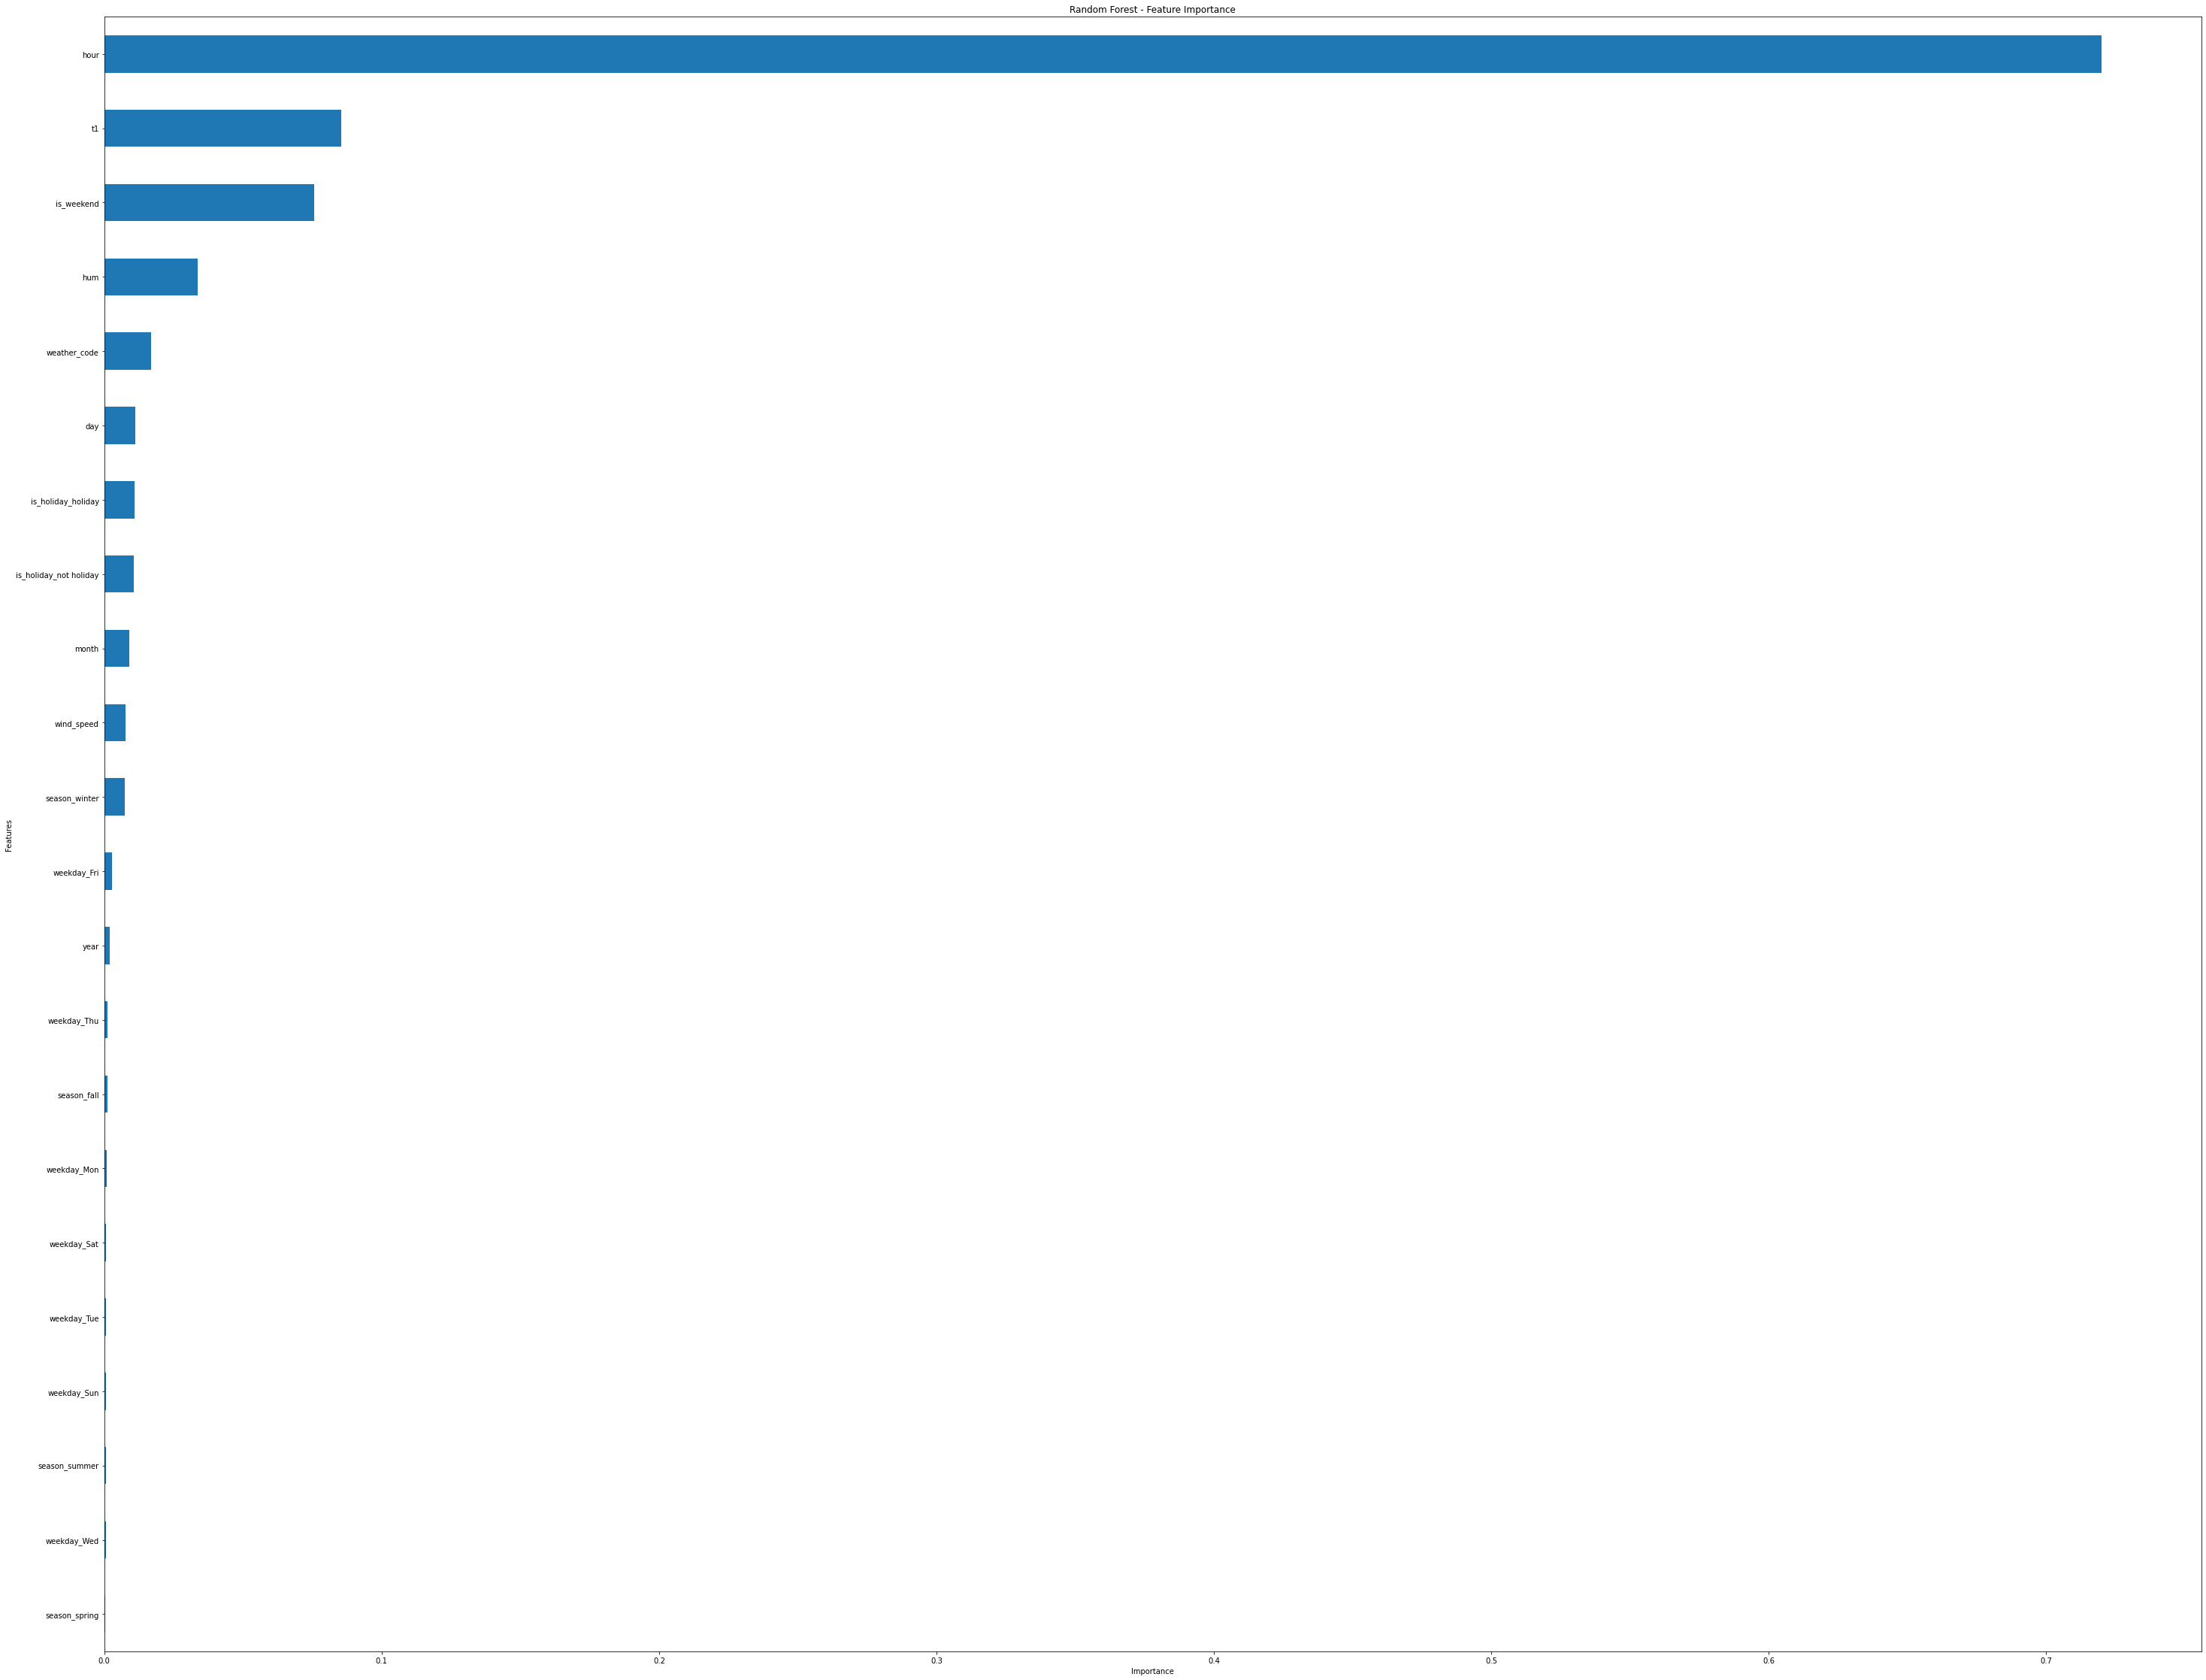

In [47]:
fea_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(50, 40), legend=None)
plt.title('Random Forest - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [48]:
fea_imp.sort_values(by=['imp'], ascending=False)

,imp,col
8,0.719920,hour
0,0.085483,t1
4,0.075678,is_weekend
1,0.033749,hum
3,0.016783,weather_code
7,0.011314,day
9,0.011041,is_holiday_holiday
10,0.010717,is_holiday_not holiday
6,0.008917,month
2,0.007611,wind_speed


We may remove last 10 features in the list based on the importance score which don't have strong impact on our model.

In [49]:
fea_imp.sort_values(by=['imp'], ascending=False).tail(10).col.values

array(['year', 'weekday_Thu', 'season_fall', 'weekday_Mon', 'weekday_Sat',
       'weekday_Tue', 'weekday_Sun', 'season_summer', 'weekday_Wed',
       'season_spring'], dtype=object)

In [50]:
X = X.drop(['year', 'season_fall', 'weekday_Thu', 'weekday_Mon', 'weekday_Sat',
       'weekday_Tue', 'weekday_Sun', 'season_summer', 'weekday_Wed',
       'season_spring'], 1)
X.head()

C:\Users\JABIR~1.KAN\AppData\Local\Temp/ipykernel_19868/1731387798.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X.drop(['year', 'season_fall', 'weekday_Thu', 'weekday_Mon', 'weekday_Sat',


,t1,hum,wind_speed,weather_code,is_weekend,month,day,hour,is_holiday_holiday,is_holiday_not holiday,season_winter,weekday_Fri
0,3.0,93.0,6.0,3.0,1.0,1,4,0,0,1,1,0
1,3.0,93.0,5.0,1.0,1.0,1,4,1,0,1,1,0
2,2.5,96.5,0.0,1.0,1.0,1,4,2,0,1,1,0
3,2.0,100.0,0.0,1.0,1.0,1,4,3,0,1,1,0
4,2.0,93.0,6.5,1.0,1.0,1,4,4,0,1,1,0


# Modelling

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 13931 rows
Test Set: 3483 rows


In [52]:
# Check shape of splitted data.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13931, 12), (3483, 12), (13931,), (3483,))

Now we have the following four datasets:

**X_train**: The feature values we'll use to train the model\
**y_train**: The corresponding labels we'll use to train the model\
**X_test**: The feature values we'll use to validate the model\
**y_test**: The corresponding labels we'll use to validate the model\

## Linear Regression

In [53]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Linear Regression Coefficiency

In [54]:
lr_coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(lr_coeff)

                        Coefficient
t1                        42.295274
hum                      -23.242013
wind_speed                -4.203008
weather_code             -12.010411
is_weekend              -214.676522
month                      9.543800
day                       -2.873626
hour                      31.506744
is_holiday_holiday      -140.078424
is_holiday_not holiday   140.078424
season_winter             52.769314
weekday_Fri              -29.795524


This means that for a unit increase in t1, there is an increase of  42.3 units in the cnt(count of bikeshares) and etc.

In [55]:
lr_pred = lr.predict(X_test)

In [56]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred})
print(lr_df.head(10))

       Actual    Predicted
6597      705  1155.351698
3181      958  1963.384891
15495     497  1041.439715
13414    1392  2323.054485
7921     3073  1937.103205
2576     2190  1972.532584
12436     138  1270.658488
17381    1350   715.177928
3479     1845   997.458167
16493    1705   898.921583


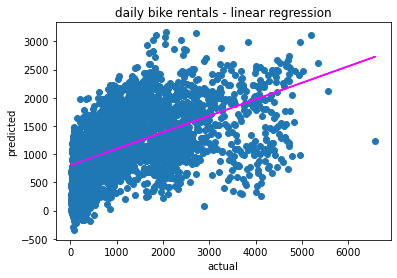

In [57]:
plt.scatter(y_test, lr_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('daily bike rentals - linear regression')
z = np.polyfit(y_test, lr_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

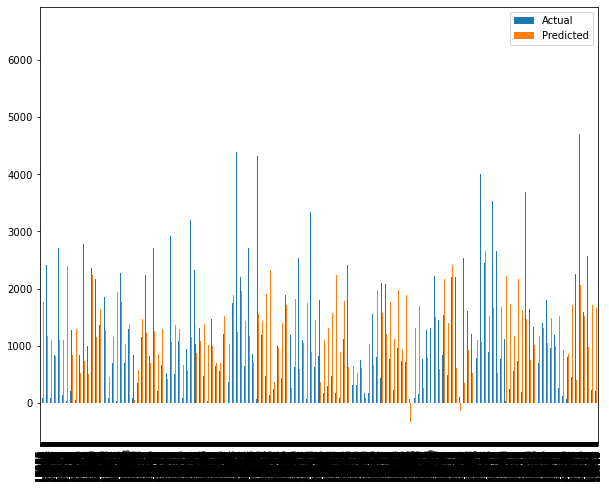

In [58]:
lr_df.plot(kind='bar', figsize=(10,8))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Linear Regression result

In [59]:
# Root Mean Squared Deviation
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))      
r2_value = r2_score(y_test, lr_pred)                     

print("Intercept: \n", lr.intercept_)
print("Root Mean Square Error \n", rmse)
print("R^2 Value: \n", r2_value)

Intercept: 
 1930.8434101931537
Root Mean Square Error 
 915.3364844692686
R^2 Value: 
 0.2999547472307209


R^2 value is almost 30% which is too low for out model. Linear regression did not perform well in our case.

Let's try Lasso and Ridge regression to see if we can improve our result

## Linear Regression - Lasso

In [60]:
model_lasso = Lasso().fit(X_train, y_train)

lasso_pred = model_lasso.predict(X_test)

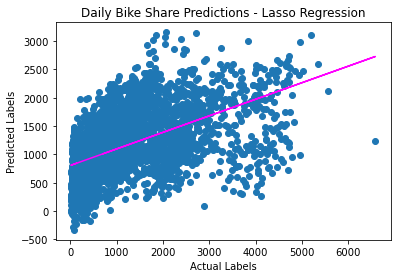

In [61]:
plt.scatter(y_test, lasso_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Lasso Regression')
# overlay the regression line
z = np.polyfit(y_test, lasso_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Lasso results


In [62]:
mse = mean_squared_error(y_test, lasso_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, lasso_pred)
print("R2:", r2)

MSE: 837992.5680716205
RMSE: 915.4193400139744
R2: 0.2998280063941049


Lasso also underperformed and performed more or less the same result with Linear Regression.

## Linear Regression - Ridge

In [63]:
model_ridge = Ridge().fit(X_train, y_train)

ridge_pred = model_ridge.predict(X_test)

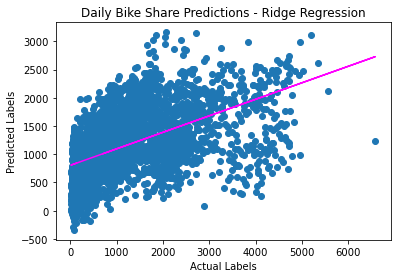

In [64]:
plt.scatter(y_test, ridge_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Ridge Regression')
# overlay the regression line
z = np.polyfit(y_test, ridge_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Ridge results

In [65]:
mse = mean_squared_error(y_test, ridge_pred)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
r2 = r2_score(y_test, ridge_pred) 
print('r2: ', r2)

MSE:  837842.8040147363
RMSE:  915.3375355652888
r2:  0.29995313948271984


As we can see from the results, it didn't change that much either. In general, Linear Regression model underperformed.

## Decision Tree 

### Decision Tree Basic

In [66]:
# Train the model
model_dtree = DecisionTreeRegressor().fit(X_train, y_train)
print (model_dtree, "\n")

# Visualize the model tree
tree = export_text(model_dtree)
print(tree)
dtr_pred = model_dtree.predict(X_test)

DecisionTreeRegressor() 

|--- feature_7 <= 6.50
|   |--- feature_7 <= 5.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_0 <= 13.25
|   |   |   |   |   |--- feature_5 <= 3.50
|   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 79.75
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 65.00
|   |   |   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |   |   |--- feature_1 >  65.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 67.25
|   |   |   |   |   |   |   |   |   |   |   |--- value: [168.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  67.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |--- feature_1 >  79.75
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.75
|   |   |   |   |   |   |   |   |   |   |--- feature_6 

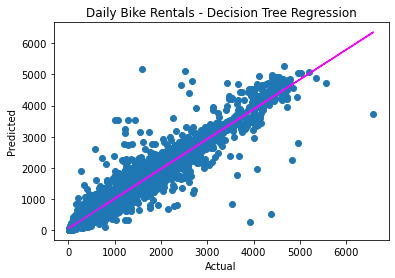

In [67]:
plt.scatter(y_test, dtr_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Daily Bike Rentals - Decision Tree Regression')
z = np.polyfit(y_test, dtr_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Decision Tree Basic - results

In [110]:
dtr_df = pd.DataFrame({'Actual': y_test, 'Predicted': dtr_pred})
print(dtr_df.head(10))

       Actual  Predicted
6597      705      841.0
3181      958     1127.0
15495     497      637.0
13414    1392     1284.0
7921     3073     2986.0
2576     2190     2123.0
12436     138      187.0
17381    1350     1520.0
3479     1845     1985.0
16493    1705     1770.0


In [68]:
mse = mean_squared_error(y_test, dtr_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, dtr_pred)
print("R2:", r2)

MSE: 103727.39305196669
RMSE: 322.06737346705376
R2: 0.9133321483365106


We see that our metrics' results on `Decision Tree Regression` model are way better when compared to Linear Regression.\
 `R^2` = 91.3%\
 `RMSE` = 322.06\
 The lower `RMSE`, the better result\
 The higher `R^2` the better result. So `Decision Tree` performed pretty good with 91.3% of accuracy.

#### Let's check the best parameters for `Decision Tree` to start tuning the model.

In [69]:
model_dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Decision Tree Regression - Tuning

##### Define parameters

In [70]:
%%time
# Train the model
mdtr_tuned = DecisionTreeRegressor().fit(X_train, y_train)
print (mdtr_tuned, "\n")

# Visualize the model tree
tree_tuned = export_text(model_dtree)
print(tree_tuned)
dtr_pred_tuned = mdtr_tuned.predict(X_test)

param_grid = {"criterion": ["mse", "mae", "squared_error"],
              "min_samples_split": [1, 2, 3, 4],
              "max_depth": [1, 2, 4, 6, 8, 10, 11],
              "min_samples_leaf": [1, 2,3, 4, 6, 10],
              "max_leaf_nodes": [2, 5, 20, 30, 100],
              }

DecisionTreeRegressor() 

|--- feature_7 <= 6.50
|   |--- feature_7 <= 5.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_0 <= 13.25
|   |   |   |   |   |--- feature_5 <= 3.50
|   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 79.75
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 65.00
|   |   |   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |   |   |--- feature_1 >  65.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 67.25
|   |   |   |   |   |   |   |   |   |   |   |--- value: [168.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  67.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |--- feature_1 >  79.75
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.75
|   |   |   |   |   |   |   |   |   |   |--- feature_6 

In [71]:
%%time
random_search = RandomizedSearchCV(mdtr_tuned, param_grid, cv=5)

random_search.fit(X_test, y_test)

C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615:

Wall time: 939 ms


C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition f

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'squared_error'],
                                        'max_depth': [1, 2, 4, 6, 8, 10, 11],
                                        'max_leaf_nodes': [2, 5, 20, 30, 100],
                                        'min_samples_leaf': [1, 2, 3, 4, 6, 10],
                                        'min_samples_split': [1, 2, 3, 4]})

##### Print the R-square and the best paramater.


In [72]:
print('R-squared:', random_search.best_score_)
print('Best parameter values {}'.format(random_search.best_params_))

R-square: 0.8915504029178521
Best parameter values {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_leaf_nodes': 100, 'max_depth': 10, 'criterion': 'mse'}


##### Improvement of the model by re-tuning.

In [73]:
param_grid = {"criterion": ["mse", "mae", "squared_error"],
              "min_samples_split": [2, 3, 4, 5],
              "max_depth": [9, 11, 13],
              "min_samples_leaf": [3, 4 , 6, 8],
              "max_leaf_nodes": [90, 100, 110]
              }

In [74]:
%%time
random_search = RandomizedSearchCV(mdtr_tuned, param_grid, cv=5)

random_search.fit(X_test, y_test)

C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition f

C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.8974693         nan        nan        nan        nan        nan
 0.88809315 0.89541569 0.89817049 0.88411683]
  warnings.warn(


Wall time: 5.35 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'squared_error'],
                                        'max_depth': [9, 11, 13],
                                        'max_leaf_nodes': [90, 100, 110],
                                        'min_samples_leaf': [3, 4, 6, 8],
                                        'min_samples_split': [2, 3, 4, 5]})

In [75]:
print('R-squared:', random_search.best_score_)
print('Best parameter values {}'.format(random_search.best_params_))

R-square: 0.8981704893262601
Best parameter values {'min_samples_split': 4, 'min_samples_leaf': 6, 'max_leaf_nodes': 100, 'max_depth': 13, 'criterion': 'mae'}


In [76]:
param_grid = {"criterion": ["mae"],
              "min_samples_split": [2],
              "max_depth": [11],
              "min_samples_leaf": [6],
              "max_leaf_nodes": [110]
              }

In [77]:
%%time
random_search = RandomizedSearchCV(mdtr_tuned, param_grid, cv=5)

random_search.fit(X_test, y_test)

C:\Users\jabir.kangarli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Wall time: 2.23 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mae'], 'max_depth': [11],
                                        'max_leaf_nodes': [110],
                                        'min_samples_leaf': [6],
                                        'min_samples_split': [2]})

In [78]:
print('R-squared:', random_search.best_score_)
print('Best parameter values {}'.format(random_search.best_params_))

R-square: 0.9002062791695279
Best parameter values {'min_samples_split': 2, 'min_samples_leaf': 6, 'max_leaf_nodes': 110, 'max_depth': 11, 'criterion': 'mae'}


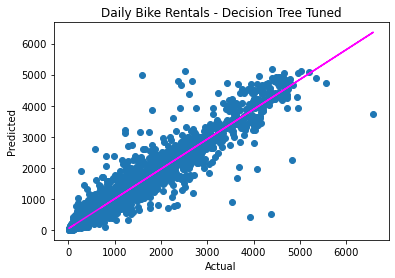

In [79]:
plt.scatter(y_test, dtr_pred_tuned)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Daily Bike Rentals - Decision Tree Tuned')
z = np.polyfit(y_test, dtr_pred_tuned, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Decision Tree Tuned results

In [111]:
dtrtuned_df = pd.DataFrame({'Actual': y_test, 'Predicted': dtr_pred_tuned})
print(dtrtuned_df.head(10))

       Actual  Predicted
6597      705      841.0
3181      958     1127.0
15495     497      613.0
13414    1392     1219.0
7921     3073     2986.0
2576     2190     1898.0
12436     138      187.0
17381    1350     1267.0
3479     1845     1985.0
16493    1705     1770.0


In [80]:
mse = mean_squared_error(y_test, dtr_pred_tuned)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, dtr_pred_tuned)
print("R2:", r2)


MSE: 98904.24318116566
RMSE: 314.49045006353634
R2: 0.917362058134243


Although the hyperparameter tuning performed very close to the main Decision Tree model, it  didn't help us to improve it. The result increased from 91.3% to 91.7%

## Random Forest

In [81]:
rf = RandomForestRegressor(n_estimators=100,random_state= 42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

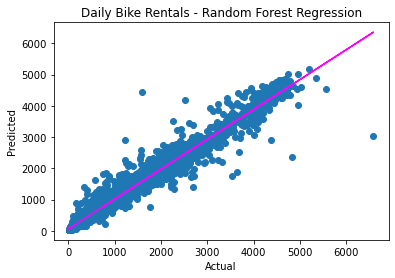

In [82]:
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Daily Bike Rentals - Random Forest Regression')
z = np.polyfit(y_test, rf_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Random Forest - result

In [112]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
print(rf_df.head(10))

       Actual  Predicted
6597      705     525.06
3181      958     933.32
15495     497     516.73
13414    1392    1317.42
7921     3073    2872.59
2576     2190    2116.85
12436     138     192.46
17381    1350    1209.94
3479     1845    1972.14
16493    1705    1632.91


In [83]:
mse = mean_squared_error(y_test, rf_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, rf_pred)
print("R2:", r2)


MSE: 50128.379474490386
RMSE: 223.89367895161843
R2: 0.958115992038384


`Random Forest` performed very good result with 95.8% of accuracy without even tuning the model.\
 `R^2` = 95.8%\
 `RMSE` = 223.89

### Let's check the best parameters for `Random Forest` to start tuning the model.

# Random Forest Regression - Tuning

## Define parameters

In [84]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [85]:
rf_tuned = RandomForestRegressor(n_estimators=100,random_state= 50)
rf_tuned.fit(X_train,y_train)
rftuned_pred = rf_tuned.predict(X_test)

In [86]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10],
    'max_features': [3, 5],
    'min_samples_leaf': [10, 30],
    'min_samples_split': [5, 15],
    'n_estimators': [200, 300]
}

In [87]:
%%time
grid_search = GridSearchCV(estimator = rf_tuned, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Wall time: 1min 1s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=50), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10],
                         'max_features': [3, 5], 'min_samples_leaf': [10, 30],
                         'min_samples_split': [5, 15],
                         'n_estimators': [200, 300]},
             verbose=2)

## Print the R-square and the best paramater.


In [88]:
print('R-squared:', grid_search.best_score_)
print('Best parameter values {}'.format(grid_search.best_params_))

R-square: 0.8767907195209071
Best parameter values {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 300}


## Improvement of the model by re-tuning.

In [89]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15],
    'max_features': [4,6],
    'min_samples_leaf': [4, 6],
    'min_samples_split': [4, 6],
    'n_estimators': [250, 300, 350]
}

In [90]:
%%time
grid_search = GridSearchCV(estimator = rf_tuned, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Wall time: 2min 35s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=50), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [4, 6], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 6],
                         'n_estimators': [250, 300, 350]},
             verbose=2)

In [91]:
print('R-squared:', grid_search.best_score_)
print('Best parameter values {}'.format(grid_search.best_params_))

R-square: 0.9403604191233267
Best parameter values {'bootstrap': True, 'max_depth': 15, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 350}


In [92]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [14, 15],
    'max_features': [6, 8],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [3, 4],
    'n_estimators': [350, 450, 500]
}

In [93]:
%%time
grid_search = GridSearchCV(estimator = rf_tuned, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Wall time: 5min 18s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=50), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [14, 15],
                         'max_features': [6, 8], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [3, 4],
                         'n_estimators': [350, 450, 500]},
             verbose=2)

In [94]:
print('R-squared:', grid_search.best_score_)
print('Best parameter values {}'.format(grid_search.best_params_))

R-square: 0.9509855481251428
Best parameter values {'bootstrap': True, 'max_depth': 15, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [95]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [15, 16],
    'max_features': [8, 10],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3],
    'n_estimators': [500, 700]
}

In [96]:
%%time
grid_search = GridSearchCV(estimator = rf_tuned, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Wall time: 6min 29s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=50), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [15, 16],
                         'max_features': [8, 10], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [500, 700]},
             verbose=2)

In [97]:
print('R-squared:', grid_search.best_score_)
print('Best parameter values {}'.format(grid_search.best_params_))

R-square: 0.9540840906530148
Best parameter values {'bootstrap': True, 'max_depth': 16, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 700}


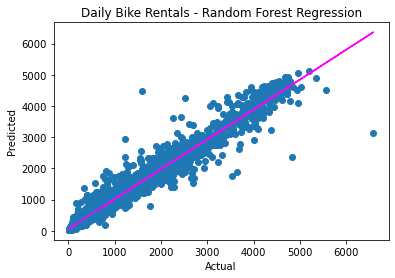

In [98]:
plt.scatter(y_test, rftuned_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Daily Bike Rentals - Random Forest Regression')
z = np.polyfit(y_test, rftuned_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [113]:
rf_tuned_df = pd.DataFrame({'Actual': y_test, 'Predicted': rftuned_pred})
print(rf_tuned_df.head(10))

       Actual  Predicted
6597      705     557.01
3181      958     881.63
15495     497     536.02
13414    1392    1329.00
7921     3073    2885.40
2576     2190    2085.45
12436     138     193.03
17381    1350    1221.59
3479     1845    1967.94
16493    1705    1651.28


In [99]:
mse = mean_squared_error(y_test, rftuned_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, rftuned_pred)
print("R2:", r2)

MSE: 50860.61924765288
RMSE: 225.5229905079588
R2: 0.9575041801902759


The hyperparameter tuning performed very close to the main Random Forest model, however, it didn't help us to improve it. Therefore, we will not be using this parameter. We definitely can improve and have better result than Basic Random Forest model but due to time constraint I have to move on to the next model.

## Neural Network - MLP Regressor

In [100]:
%%time
mlp = nn.MLPRegressor(hidden_layer_sizes = (256,),solver = 'adam', activation = 'relu',  random_state=42, max_iter=4000).fit(X_train, y_train)

Wall time: 8min 59s


In [101]:
mlp_pred = mlp.predict(X_test)

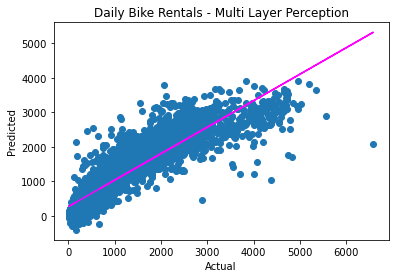

In [102]:
plt.scatter(y_test, mlp_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Daily Bike Rentals - Multi Layer Perceptron')
z = np.polyfit(y_test, mlp_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [114]:
mlp_df = pd.DataFrame({'Actual': y_test, 'Predicted': mlp_pred})
print(mlp_df.head(10))

       Actual    Predicted
6597      705   897.479465
3181      958  1180.596944
15495     497   253.647975
13414    1392  1603.094162
7921     3073  2309.275148
2576     2190  2355.154042
12436     138    89.746889
17381    1350  1541.323912
3479     1845  2241.513566
16493    1705  1678.072032


In [103]:
mse = mean_squared_error(y_test, mlp_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, mlp_pred)
print("R2:", r2)

MSE: 230854.4565062167
RMSE: 480.47315898624004
R2: 0.8071130566029692


# Conclusion:

According to our models' `R^2` and `RMSE` results, which are shown below:

1. ``Linear Regression`` - 29.9%,  915.33
2. ``Lasso Regression`` - 29.9%, 915.41
3. ``Ridge Regression`` - 29.9%,  915.33
4. ``Decision Tree Basic`` - 91.3%, 322.06
5. ``Decision Tree Tuned`` - 91.7%, 314.49
6. ``Random Forest`` - 95.8%, 223.89
7. ``Random Forest Tuned`` - 95.7%, 225.52
7. ``MLP Regression`` - 80.7%, 480.47


Random Forest performed the best result with 95.8% accuracy.